In [1]:
# !pip install torchvision
# !pip install torch

In [1]:
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

In [2]:
#checking for device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
print(device)

cpu


In [4]:
#Transforms
transformer=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std   # z-score normalization
                        [0.5,0.5,0.5])
])

In [6]:
# # virtually splitting my images into train and test 

# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader, random_split, RandomSampler

# # Path for the dataset directory
# dataset_path = r"E:\g42(cattle-proj)\cattle_g42_crop"

# # Create the ImageFolder dataset
# dataset = torchvision.datasets.ImageFolder(dataset_path, transform=transformer)

# # Split the dataset into training and testing sets
# train_size = int(0.8 * len(dataset))  # 80% for training, adjust as needed
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# # Create data loaders for training and testing using RandomSampler
# train_loader = DataLoader(
#     train_dataset,
#     batch_size=64,
#     sampler=RandomSampler(train_dataset),  # Randomly sample the training data
#     shuffle=False  # No need to shuffle because RandomSampler does it
# )

# test_loader = DataLoader(
#     test_dataset,
#     batch_size=32,
#     shuffle=True  # Shuffle the testing data
# )


In [7]:
# # to make a new folder cattle_final_dataset and split my images into train and test folders seperately
    
    
# import os
# import shutil
# import random

# # Set the paths for the source and destination directories
# source_dir = "E:\g42\cattle_g42_crop"  # Replace with the path to your "cattle" directory
# destination_dir = "E:\g42\cattle_final_dataset"  # Replace with the path to your "dataset" directory

# # Create the "dataset" directory if it doesn't exist
# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# # Create "train" and "test" directories inside "dataset"
# train_dir = os.path.join(destination_dir, "train")
# test_dir = os.path.join(destination_dir, "test")

# os.makedirs(train_dir)
# os.makedirs(test_dir)

# # Get a list of subdirectories (each representing a cattle category)
# cattle_folders = os.listdir(source_dir)

# # Loop through each cattle folder
# for folder in cattle_folders:
#     source_folder = os.path.join(source_dir, folder)
#     train_folder = os.path.join(train_dir, folder)
#     test_folder = os.path.join(test_dir, folder)

#     # Create corresponding folders in "train" and "test"
#     os.makedirs(train_folder)
#     os.makedirs(test_folder)

#     # Get a list of image files in the cattle folder
#     image_files = os.listdir(source_folder)

#     # Calculate the number of images to move to "train" and "test"
#     num_images = len(image_files)
#     num_train_images = int(0.8 * num_images)  # 80% for training
#     num_test_images = num_images - num_train_images  # 20% for testing

#     # Randomly shuffle the list of image files
#     random.shuffle(image_files)

#     # Copy the images to "train" and "test" folders based on the calculated percentages
#     for i, image in enumerate(image_files):
#         if i < num_train_images:
#             shutil.copy(os.path.join(source_folder, image), os.path.join(train_folder, image))
#         else:
#             shutil.copy(os.path.join(source_folder, image), os.path.join(test_folder, image))


In [5]:


import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os

# Path for the main dataset directory
dataset_path = r"E:\g42(cattle-proj)\cattle_final_dataset"

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = torchvision.datasets.ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Create the custom datasets
train_dataset = CustomDataset(os.path.join(dataset_path, 'train'), transform=transformer)
test_dataset = CustomDataset(os.path.join(dataset_path, 'test'), transform=transformer)

# Create data loaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [6]:
#categories
root1=pathlib.Path(os.path.join(dataset_path, 'test'))
classes1=sorted([j.name.split('/')[-1] for j in root1.iterdir()])
print(classes1)
print(len(classes1))

['150_muzzle', '151_muzzle', '152_muzzle', '153_muzzle', '154_muzzle', '155_muzzle', '156_muzzle', '157_muzzle', '158_muzzle', '159_muzzle', '160_muzzle', '161_muzzle', '162_muzzle', '163_muzzle', '164_muzzle', '165_muzzle', '166_muzzle', '167_muzzle', '168_muzzle', '169_muzzle', '170_muzzle', '171_muzzle', '172_muzzle', '173_muzzle', '174_muzzle', '175_muzzle', '176_muzzle', '177_muzzle', '178_muzzle', '179_muzzle', '180_muzzle', '181_muzzle', '182_muzzle', '183_muzzle', '184_muzzle', '185_muzzle', '186_muzzle', '187_muzzle', '188_muzzle', '189_muzzle', '190_muzzle', '191_muzzle', '192_muzzle', '193_muzzle', '194_muzzle', '195_muzzle', '196_muzzle', '197_muzzle', '198_muzzle', '199_muzzle', '200_muzzle', '201_muzzle', '204_muzzle', '205_muzzle', '206_muzzle', '207_muzzle', '208_muzzle', '209_muzzle', '210_muzzle', '211_muzzle', '212_muzzle', '213_muzzle', '214_muzzle', '215_muzzle', '216_muzzle', '217_muzzle', '218_muzzle', '220_muzzle', '221_muzzle', '222_muzzle', '224_muzzle', '225_

In [17]:
#categories
root=pathlib.Path(os.path.join(dataset_path, 'train'))
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [18]:
print(classes)

['150_muzzle', '151_muzzle', '152_muzzle', '153_muzzle', '154_muzzle', '155_muzzle', '156_muzzle', '157_muzzle', '158_muzzle', '159_muzzle', '160_muzzle', '161_muzzle', '162_muzzle', '163_muzzle', '164_muzzle', '165_muzzle', '166_muzzle', '167_muzzle', '168_muzzle', '169_muzzle', '170_muzzle', '171_muzzle', '172_muzzle', '173_muzzle', '174_muzzle', '175_muzzle', '176_muzzle', '177_muzzle', '178_muzzle', '179_muzzle', '180_muzzle', '181_muzzle', '182_muzzle', '183_muzzle', '184_muzzle', '185_muzzle', '186_muzzle', '187_muzzle', '188_muzzle', '189_muzzle', '190_muzzle', '191_muzzle', '192_muzzle', '193_muzzle', '194_muzzle', '195_muzzle', '196_muzzle', '197_muzzle', '198_muzzle', '199_muzzle', '200_muzzle', '201_muzzle', '204_muzzle', '205_muzzle', '206_muzzle', '207_muzzle', '208_muzzle', '209_muzzle', '210_muzzle', '211_muzzle', '212_muzzle', '213_muzzle', '214_muzzle', '215_muzzle', '216_muzzle', '217_muzzle', '218_muzzle', '220_muzzle', '221_muzzle', '222_muzzle', '224_muzzle', '225_

In [19]:
print(len(classes))

146


In [6]:
#CNN Network


class ConvNet(nn.Module):
    def __init__(self,num_classes):
        super(ConvNet,self).__init__()
        
        #Output size after convolution filter
        #((w-f+2P)/s) + 1
        
        #Input shape= (256,3,150,150)
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #Shape= (256,12,150,150)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #Shape= (256,12,150,150)
        self.relu1=nn.ReLU()
        #Shape= (256,12,150,150)
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be factor 2
        #Shape= (256,12,75,75)
        
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        #Shape= (256,20,75,75)
        self.relu2=nn.ReLU()
        #Shape= (256,20,75,75)
        
        
        
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        #Shape= (256,32,75,75)
        self.bn3=nn.BatchNorm2d(num_features=32)
        #Shape= (256,32,75,75)
        self.relu3=nn.ReLU()
        #Shape= (256,32,75,75)
        
        
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
        
        
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
            
            
            #Above output will be in matrix form, with shape (256,32,75,75)
            
        output=output.view(-1,32*75*75)
            
            
        output=self.fc(output)
            
        return output
            
        

In [13]:
model=ConvNet(num_classes=len(classes)).to(device)

In [14]:
#Optmizer and loss function
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [15]:
# Calculate the size of the training and testing datasets
train_count = len(train_dataset)
test_count = len(test_dataset)

print(f"Number of training images: {train_count}")
print(f"Number of testing images: {test_count}")


Number of training images: 1205
Number of testing images: 360


In [16]:
num_epochs=40

In [17]:
#Model training and saving best model

best_accuracy=0.0

for epoch in range(num_epochs):
    
    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        
        
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    
    
    # Evaluation on testing dataset
    model.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
    
    test_accuracy=test_accuracy/test_count
    
    
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    #Save the best model
    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'cattle_aadhar.model')
        best_accuracy=test_accuracy
    
    

In [18]:
# !pip install module-name

In [20]:
import torch

# Create an instance of your model
model = ConvNet(num_classes=len(classes))  # Replace with your actual model class and configuration

# Load the saved model weights
model.load_state_dict(torch.load('cattle_aadhar_100epochs.model'))

# Set the model in evaluation mode (important if you're using dropout or batch normalization)
model.eval()


ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=146, bias=True)
)

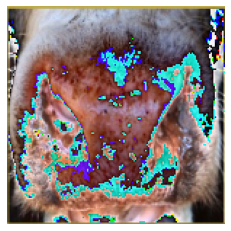

tensor([[ 1.5699e-01,  1.3340e+02, -3.3562e+01,  8.2098e-01,  4.8288e-01,
         -5.9272e+00,  9.8482e-01, -1.4058e+01,  8.1069e+00,  8.5382e+00,
         -1.7774e+01,  2.8237e+01, -8.9055e+01,  2.7346e+01, -2.7965e+01,
          3.7169e+01,  5.0898e+01, -1.1005e+01, -9.2732e+01,  3.3676e+01,
         -5.6863e-01, -1.0964e+02,  8.9016e-02, -2.7965e+01, -8.1257e+00,
         -5.7782e+01, -1.1867e+02,  7.8381e+00, -4.0015e+01, -3.5536e+01,
          1.1761e+01,  4.3761e+00,  4.8279e+00, -9.0700e+01, -1.8532e+01,
          1.7290e+00, -3.1482e+01,  1.3521e+01,  5.2846e+01, -1.0994e+02,
         -2.8755e+01, -1.0872e+02,  4.3267e+00, -3.2725e+01, -2.1199e+01,
         -8.5734e+01,  2.5748e+01, -3.2263e+01,  8.8388e+00, -2.8291e+01,
          6.2239e+00,  4.1419e+00, -3.6528e+01,  1.0486e+01, -6.1435e+01,
         -1.5998e+01, -2.9681e+01, -2.0981e+01,  3.2367e+01, -9.0317e+01,
         -6.4730e+00,  1.1902e+01,  6.5939e+00,  4.6065e+00, -2.1960e+01,
         -3.4827e+00, -1.9852e+01, -3.

In [22]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load the input image
image_path = r"E:\g42(cattle-proj)\cattle_final_dataset\test\151_muzzle\IMG_1300.JPG" # Replace with the path to your image
image = Image.open(image_path)

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize the image to match the input size used during training
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize pixel values
])

# Apply the transformation to the image
input_image = transform(image).unsqueeze(0)  # Add a batch dimension

# Print the input image
plt.imshow(transforms.ToPILImage()(input_image.squeeze(0)))  # Convert the tensor back to an image
plt.axis('off')  # Hide axis labels
plt.show()

# Make a prediction
with torch.no_grad():
    output = model(input_image)
    
    
print(output)
print(torch.max(output))

# Get the predicted class index
_, predicted_class = torch.max(output, 1)
confidence = torch.softmax(output, 1)[0][predicted_class.item()] * 100

# Map the class index to the actual class name (if you have a list of class names)
predicted_class_name = classes[predicted_class.item()]

# print(f"The predicted class is: {predicted_class_name}")

# print(f"Confidence: {confidence:.2f}%")

# Define a confidence threshold (adjust this value as needed)
confidence_threshold = 98  # Example threshold value

# Check if the confidence score is below the threshold
if confidence < confidence_threshold:
    print("The image is not registered.")
else:
    print(f"The predicted class is: {predicted_class_name}")
    print(f"Confidence: {confidence:.2f}%")

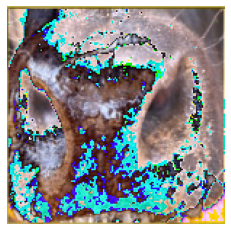

tensor([[ -20.9782,  -79.1899,  -58.6910,   -5.0442,  -29.3485,  -49.1038,
          -47.2470,   30.8798,  -41.1639,   -2.2678,  -34.2196,   17.5782,
          -83.6238,   23.5620,   -2.5793,  -34.4515,   91.8042,  -56.5002,
           -1.9292,   58.0095,   -4.8625,  -12.1762,   -7.3554,  -31.6447,
          -11.6218,  -23.5200, -147.5602,  -42.8309,   -1.8310,  -20.0097,
          -33.4767,  -26.6218,  -14.8585,   -0.5101,   22.2428,  -21.9741,
          -90.9090,   29.5827,  -95.8039, -102.2038,  -71.8581,   27.1448,
          -86.6911,   24.9934,   37.2614,    4.7596,   16.6531,   23.1728,
           12.5611,   20.4649,    5.2748,   19.6573,  -10.3123,   47.3474,
          -67.6164,   17.1169,  -19.1821,   15.6811,  -14.5068, -108.9108,
           39.6951,   38.6370,   50.4758,   -2.2419,  -12.6725,   13.2385,
           35.1486,  -94.9293,  -66.8506,   12.7084,  -36.8393,  -35.7854,
         -137.7089, -119.9733,  -40.8098,   -5.2677,  -13.1695,  -33.9108,
          -24.3186,  -83.

In [27]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load the input image
image_path = r"E:\g42\cattle_final_dataset\250_muzzle\IMG_2357.JPG" # Replace with the path to your image
image = Image.open(image_path)

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize the image to match the input size used during training
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize pixel values
])

# Apply the transformation to the image
input_image = transform(image).unsqueeze(0)  # Add a batch dimension

# Print the input image
plt.imshow(transforms.ToPILImage()(input_image.squeeze(0)))  # Convert the tensor back to an image
plt.axis('off')  # Hide axis labels
plt.show()

# Make a prediction
with torch.no_grad():
    output = model(input_image)
    
print(output)

print(torch.max(output))

# Get the predicted class index
_, predicted_class = torch.max(output, 1)
confidence = torch.softmax(output, 1)[0][predicted_class.item()] * 100

print(predicted_class)
print(predicted_class.item())
# Map the class index to the actual class name (if you have a list of class names)
predicted_class_name = classes[predicted_class.item()]

print(classes)
# print(f"The predicted class is: {predicted_class_name}")

# print(f"Confidence: {confidence:.2f}%")

# Define a confidence threshold (adjust this value as needed)
confidence_threshold = 98.5  # Example threshold value

# Check if the confidence score is below the threshold
if confidence < confidence_threshold:
    print("The image is not registered.")
else:
    print(f"The predicted class is: {predicted_class_name}")
    print(f"Confidence: {confidence:.2f}%")

In [22]:
# new registration process

In [25]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import os

# Define your transformation
transformer = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Path to the existing model
model_path = 'cattle_aadhar_copy.model'

# Path for the new data
new_data_path = r"E:\g42\new_added"

# Define your model architecture
class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=12)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.relu3 = nn.ReLU()
        self.fc = nn.Linear(in_features=75 * 75 * 32, out_features=num_classes)

    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        output = self.pool(output)
        output = self.conv2(output)
        output = self.relu2(output)
        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)
        output = output.view(-1, 32 * 75 * 75)
        output = self.fc(output)
        return output

# Load the existing model
model = ConvNet(num_classes=len(classes)).to(device)
model.load_state_dict(torch.load(model_path))

# Update the model's architecture for the combined dataset (146 old IDs + 1 new ID)
combined_num_classes = len(classes) + 1  # 146 old cattle IDs + 1 new cattle ID (250)
model.fc = nn.Linear(in_features=75 * 75 * 32, out_features=combined_num_classes)

# Define the optimizer and loss function
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()

# Combine the old and new datasets using a custom dataset class
class CombinedDataset(Dataset):
    def __init__(self, dataset1, dataset2):
        self.dataset1 = dataset1
        self.dataset2 = dataset2

    def __len__(self):
        return len(self.dataset1) + len(self.dataset2)

    def __getitem__(self, idx):
        if idx < len(self.dataset1):
            return self.dataset1[idx]
        else:
            return self.dataset2[idx - len(self.dataset1)]
        
new_data = CustomDataset(os.path.join(dataset_path, new_data_path), transform=transformer)

# Create the combined dataset
combined_dataset = CombinedDataset(train_dataset, new_data)
combined_loader = DataLoader(combined_dataset, batch_size=64, shuffle=True)

# Fine-tune the model on the combined dataset
model.train()

for epoch in range(10):  # Adjust the number of fine-tuning epochs
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(combined_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, prediction = torch.max(outputs.data, 1)
        train_accuracy += int(torch.sum(prediction == labels.data))

    train_accuracy = train_accuracy / len(combined_dataset)
    train_loss = train_loss / len(combined_dataset)

    print(f'Fine-Tuning Epoch: {epoch}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

# Save the updated model
torch.save(model.state_dict(), 'cattle_aadhar_updated.model')


RuntimeError: Error(s) in loading state_dict for ConvNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([147, 180000]) from checkpoint, the shape in current model is torch.Size([146, 180000]).
	size mismatch for fc.bias: copying a param with shape torch.Size([147]) from checkpoint, the shape in current model is torch.Size([146]).

In [ ]:
import torch

# Create an instance of your model
model = ConvNet(num_classes=combined_num_classes)  # Replace with your actual model class and configuration

# Load the saved model weights
model.load_state_dict(torch.load('cattle_aadhar_updated.model'))

# Set the model in evaluation mode (important if you're using dropout or batch normalization)
model.eval()

In [ ]:
#categories
root=pathlib.Path(os.path.join(r'E:\g42\new_added', 'train'))
new_class=sorted([j.name.split('/')[-1] for j in root.iterdir()])

for i in classes:
    new_class.append(i)

classes.append('250_muzzle')

print(classes)
print(new_class)

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Define the transformation for input images (should match the one used during training)
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load the trained model
model_path = 'cattle_aadhar_updated.model'
model = ConvNet(num_classes=combined_num_classes)  # Update with the correct number of classes
model.load_state_dict(torch.load(model_path))
model.eval()  # Set the model to evaluation mode

# Load and preprocess the input image
input_image_path = r"E:\g42\cattle_final_dataset\train\154_muzzle\IMG_1332.JPG"  # Update with the path to your image
input_image = Image.open(input_image_path)
input_tensor = transform(input_image)
input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_tensor)

# Get the predicted class
_, predicted_class = torch.max(output, 1)

print(predicted_class.item())

# Print the predicted class
print(f'Predicted Class: {new_class[predicted_class.item()]}')

print(f'Predicted Class: {classes[predicted_class.item()]}')

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Define the transformation for input images (should match the one used during training)
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load the trained model
model_path = 'cattle_aadhar_updated.model'
model = ConvNet(num_classes=combined_num_classes)  # Update with the correct number of classes
model.load_state_dict(torch.load(model_path))
model.eval()  # Set the model to evaluation mode

# Load and preprocess the input image
input_image_path = r"E:\g42\cattle_final_dataset\train\153_muzzle\IMG_1313.JPG"  # Update with the path to your image
input_image = Image.open(input_image_path)
input_tensor = transform(input_image)
input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_tensor)

print(output)

# Get the predicted class
_, predicted_class = torch.max(output, 1)

# Correctly map the predicted class to the class label using the class mapping
if predicted_class.item() == combined_num_classes - 1:
    predicted_class_label = "New Cattle ID"  # Replace with your label for the new cattle ID
else:
    predicted_class_label = classes[predicted_class.item()]
    
# print(classes)
print(predicted_class.item())

# Print the predicted class
print(f'Predicted Class: {predicted_class_label}')



In [ ]:
import torch

# Assuming tensor1 and tensor2 are your two tensors
tensor1 = torch.tensor([[  6.5371, -19.3360, -19.0776, -14.4396, -16.8002, -22.5280,  -7.6527,
         -17.9633, -16.5074, -14.0633, -18.8894, -25.7352, -25.2688, -12.9061,
         -13.2991, -18.6366, -15.0103, -24.0876, -21.3251, -22.3753, -18.7472,
         -20.5405, -16.4260, -16.0588, -24.2321,  -7.4647, -17.2443, -18.1174,
          -6.5236, -13.5583,  -4.8678, -14.8383, -12.2263, -15.8481, -22.3048,
         -11.0926, -18.2959,  -6.2079, -23.2852, -16.9684, -30.2456, -21.4383,
         -20.7051, -14.9434, -20.9345, -20.2689, -24.2631,  -2.7388, -24.5607,
          -5.7049, -10.7160, -10.1493, -13.5380, -13.0908, -15.1456, -11.6808,
          -8.5991, -18.8080, -21.1398, -20.2393, -10.5309, -18.8499, -21.3764,
         -19.8163,  -5.9118, -27.1839, -10.5513, -14.9402, -21.9184, -20.0329,
         -22.2188, -19.6090, -22.1819, -13.2962, -21.6181, -10.5572, -12.7969,
         -17.0915,  -9.2038, -17.3579, -14.4668, -17.7998, -15.8298, -20.7652,
          -5.7256,  -4.8463, -14.7671, -15.4504, -21.5040, -12.9719,  -2.6970,
         -19.7600, -19.2650, -13.5190, -21.9013, -15.4935, -18.7133,  -4.1327,
         -11.0829, -10.8150, -17.7478, -20.1107, -13.3786, -19.7994, -16.3275,
          -7.4085, -13.2405, -14.3043, -12.3779, -19.9927, -22.0098, -14.3770,
          -5.3350, -18.6119,  -7.3580, -10.5836, -22.4312, -18.6632, -17.0329,
         -10.6835, -25.3300, -27.0039, -16.6436,  -8.7019, -10.4306, -15.7599,
         -23.0024, -13.1891, -14.7553, -16.1825, -29.4267, -21.9308, -12.9502,
         -10.3692, -12.3828, -18.2302, -16.5014, -22.5469, -20.5992, -19.9890,
         -12.0633, -14.3399, -20.1560, -12.3453,  -9.5356,  -0.4668, -44.5037]])

tensor2 = torch.tensor([[  9.5424, -23.6340, -29.0779, -24.3913, -25.1843, -31.2242, -15.2095,
         -22.2791, -28.1671, -21.9873, -30.5131, -36.7235, -32.1511, -20.7674,
         -16.7840, -25.5771, -20.5994, -38.3753, -15.8138, -32.1284, -28.4576,
         -16.1448, -27.9621, -21.5243, -28.2380,  -4.5522, -20.0330, -26.3655,
         -15.0433, -18.7214, -15.4056, -16.2614, -13.6040, -21.8995, -27.2476,
         -12.6512, -26.8652,  -8.4423, -29.6405, -23.4859, -33.6291, -28.0008,
         -27.8274, -28.4335, -23.8277, -18.0989, -27.3182, -16.7000, -29.8366,
         -15.2044, -16.0721, -18.3276, -32.3414, -20.0376, -27.0423, -22.2444,
         -24.4003, -16.8287, -26.7648, -33.3757,  -4.9305, -15.7985, -15.6606,
         -25.4034, -16.2415, -38.1160, -11.5713, -15.6831, -34.3122, -31.2038,
         -29.0544, -22.1235, -33.5313, -18.9547, -33.8798, -20.0551, -21.3525,
         -22.6087, -11.3375, -27.7518, -28.0023, -21.3714, -21.5219, -32.4895,
          -9.5645,  -5.6787, -19.5105, -22.5781, -24.9135, -32.8573, -10.2477,
         -23.8981, -24.1108, -12.5385, -16.2015, -15.7753, -23.5596,  -5.4514,
         -15.2890, -12.7940, -30.9049, -31.1625, -26.3564, -35.4481, -22.6666,
          -9.8406, -23.8854, -21.4597, -21.2447, -27.8674, -29.4481, -26.5718,
         -16.3144, -24.2873, -17.0973, -21.7754, -29.5936, -25.6418, -24.4927,
         -19.6083, -31.7156, -34.0437, -26.5027, -16.6187, -19.2571, -23.9305,
         -30.0099, -26.0544, -29.3201, -23.2846, -35.4558, -32.6372, -18.0226,
         -28.2430, -28.3306, -22.8457, -22.6480, -31.5130, -31.9289, -30.4340,
         -20.6324, -20.8454, -31.4170, -16.9806,  -9.1389,  -5.7061, -62.6420]])

tensor3 = torch.tensor([[  6.6506, -19.5557, -24.4939, -19.8511, -26.3727, -29.8079, -13.8146,
         -19.8867, -28.0225, -16.1575, -26.1401, -35.0539, -31.0443, -15.5158,
         -11.5478, -22.4979, -15.9906, -31.2238, -20.0162, -24.4720, -25.3488,
         -19.7117, -22.6284, -18.2487, -29.1556,  -7.8666, -23.8772, -23.7595,
         -12.6846, -16.9903, -13.1534, -17.7321, -14.4833, -20.1446, -22.1767,
         -12.2012, -25.5303,  -8.1958, -28.7319, -22.1111, -34.1862, -23.2008,
         -21.3176, -24.8225, -20.3983, -20.6235, -25.7248,  -9.7157, -28.2223,
          -9.8268, -15.0869, -16.4228, -25.1706, -18.7951, -20.8164, -20.9963,
         -14.8422, -18.5897, -27.2247, -28.9047, -12.0006, -18.9858, -19.9130,
         -24.3318, -10.0797, -32.3742,  -7.2027, -16.0642, -29.0359, -27.2658,
         -25.1641, -16.0646, -25.2300, -19.1700, -25.6453, -19.9797, -20.8379,
         -16.2871, -11.1865, -24.2838, -22.9473, -24.4453, -19.1783, -26.3323,
          -5.7410,  -7.0940, -17.0841, -21.4742, -22.4471, -22.2434,  -6.8170,
         -21.8467, -23.1927, -13.0653, -18.5982, -17.4860, -24.4700,  -5.7101,
         -10.6467, -15.1693, -22.1948, -24.9848, -17.0153, -31.6902, -20.0562,
         -10.1024, -20.4604, -19.8150, -20.5040, -28.7850, -30.1360, -22.8967,
         -12.0286, -25.2543,  -9.8078, -14.3832, -25.3405, -25.1746, -21.3535,
         -14.4332, -27.2321, -33.0637, -23.6632, -17.6941, -19.1897, -17.2949,
         -28.7850, -18.8521, -23.2632, -19.8440, -33.8522, -26.3803, -14.0426,
         -19.0468, -22.1209, -21.0297, -17.8499, -29.9843, -27.2982, -21.0777,
         -15.8584, -16.4656, -29.2091, -15.5814,  -9.6041,  -3.8786, -57.9118]])

tensor4 = torch.tensor([[ -3.4824, -10.8680,  -8.1529,   5.4700, -11.6167, -17.2581, -10.9423,
         -12.9003, -10.1830, -12.9856,  -9.6973, -28.6968, -24.4891, -10.1501,
         -14.8255, -11.5762,  -8.8104, -11.5376, -25.0054, -14.5749, -16.0652,
         -17.5483, -14.1089, -12.6145, -11.3810, -16.7445, -25.0733, -12.6694,
         -11.9169, -15.8379, -10.8573, -21.8769, -18.8176, -21.1937, -13.4471,
         -19.0147,  -8.0860, -16.4221, -14.8214, -13.9633, -27.5173, -15.7050,
          -7.1690, -17.3499, -16.4446, -15.7085, -15.6009,  -8.1334,  -9.7322,
          -7.3527, -19.2011, -11.4397,  -9.4702, -13.8731, -17.1898,  -9.3663,
         -10.4188, -15.9549, -14.1349, -14.2393, -15.6420,  -9.8525, -17.2397,
         -18.5343,  -6.2280, -18.1943, -12.3533, -12.8807, -18.0223, -23.3994,
         -17.5456,  -8.2631, -15.1875,  -8.4856, -20.1222, -15.2967, -14.8282,
          -7.8134, -12.3526, -17.2257, -17.8997, -10.4578, -17.3465,  -9.4866,
         -18.0180, -19.3010, -19.5958, -14.7932, -12.2732, -12.9189,  -5.4484,
          -6.3284, -12.7052, -13.9353, -15.6860, -22.2755, -14.8091,  -8.7975,
         -10.0313, -22.6271, -20.6745, -13.3297, -11.3387, -18.8216, -15.5083,
          -6.1811,  -7.1955, -20.7856, -14.9561, -14.6680, -16.2311, -16.2188,
         -14.5527, -11.3940, -12.9701,  -8.7783, -11.0011,  -7.1113, -15.3198,
          -8.4124, -12.8897, -11.7705,  -6.7462, -16.0557, -14.1750, -10.6590,
         -21.2112, -12.2705, -13.9947,  -9.9216,  -9.9698, -12.3600,  -9.9378,
         -14.3154, -13.8376,  -8.2310,  -9.6981, -18.8056, -30.9564, -18.6544,
          -5.7622, -10.9579, -11.6333,  -7.4965,  -9.7484, -13.2656, -46.1898]])

# # Calculate the Euclidean distance
# distance12 = torch.norm(tensor1 - tensor2)
# distance13 = torch.norm(tensor1 - tensor3)
# distance23 = torch.norm(tensor2 - tensor3)
# distance14 = torch.norm(tensor1 - tensor4)
# distance24 = torch.norm(tensor2 - tensor4)
# distance34 = torch.norm(tensor3 - tensor4)

# print(distance12)
# print(distance13)
# print(distance23)
# print(distance14)
# print(distance24)
# print(distance34)


import torch.nn.functional as F

similarity12 = F.cosine_similarity(tensor1, tensor2)
similarity13 = F.cosine_similarity(tensor1, tensor3)
similarity23 = F.cosine_similarity(tensor2, tensor3)
similarity14 = F.cosine_similarity(tensor1, tensor4)
similarity24 = F.cosine_similarity(tensor2, tensor4)
similarity34 = F.cosine_similarity(tensor3, tensor4)


# Print the distance
print(similarity12)
print(similarity12)
print(similarity23)
print(similarity14)
print(similarity24)
print(similarity34)


In [ ]:
# import numpy as np

# # Convert the PyTorch tensors to NumPy arrays
# tensor1_np = tensor1.cpu().numpy()
# tensor2_np = tensor2.cpu().numpy()
# tensor3_np = tensor3.cpu().numpy()

# correlation1 = torch.corrcoef(tensor1_np, tensor2_np)
# # correlation2 = torch.corrcoef(tensor3, tensor2)
# # correlation3 = torch.corrcoef(tensor1, tensor3)

# print(correlation1[0,1])
# # print(correlation2)
# # print(correlation3)

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Define the transformation for input images (should match the one used during training)
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load the trained model
model_path = 'cattle_aadhar_updated.model'
model = ConvNet(num_classes=combined_num_classes)  # Update with the correct number of classes
model.load_state_dict(torch.load(model_path))
model.eval()  # Set the model to evaluation mode

# Load and preprocess the input image
input_image_path = r"E:\g42\cattle_final_dataset\train\153_muzzle\IMG_1313.JPG"  # Update with the path to your image
input_image = Image.open(input_image_path)
input_tensor = transform(input_image)
input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_tensor)

# print(output)

input_image = output.numpy()

print(input_image)

tensor_input = torch.tensor(input_image)



In [ ]:
# to acccess each image present in each cattle id

b = False

import os

import torch
import torch.nn.functional as F

parent_directory = r"E:\g42\cattle_final_dataset\train"  # Replace with the path to your "cattle" directory

sl=[]
cl=[]

# Iterate through each subdirectory (representing different cattle)
for cattle_id in os.listdir(parent_directory):
    cattle_directory = os.path.join(parent_directory, cattle_id)

    # Ensure it's a directory
    if os.path.isdir(cattle_directory):
#         print(f"Accessing cattle ID: {cattle_id}")
        
        i=0

        # Iterate through image files in the cattle's directory
        for image_file in os.listdir(cattle_directory):
            i+=1
            if(i==1):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    image_path = os.path.join(cattle_directory, image_file)
#                     print(f"Processing image: {image_path}")
                    
                    # to replace \ by \\
                    
                    image_path='r'+image_path[0:]
                    i = 0
                    # print(image_path)
                    while i < len(image_path):
                    # print(image_path[i])
                        if image_path[i] == '\\':
                            i = i + 1
                            image_path = image_path[:i] + '\\' + image_path[i:]
                        i = i + 1
                    image_path=image_path[1:]
#                     print(image_path)
                    
                    # Load and preprocess the input image
                    input_image_path = image_path  # Update with the path to your image
                    input_image = Image.open(input_image_path)
                    input_tensor = transform(input_image)
                    input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension

                    # Make predictions
                    with torch.no_grad():
                        output = model(input_tensor)
                    
                    class_checker = output.numpy()
                    
                    tensor_class = torch.tensor(class_checker)
                    
                    similarity=F.cosine_similarity(tensor_input, tensor_class)
                    
#                     print(class_checker)
                    
                    if((similarity.item())>0.97):
                        b = True
                        cl.append(cattle_id)
                        sl.append(similarity)
#                         print("prediction class is ",cattle_id)
                        
                    # Here, you can perform any processing you need on the image


# Note: Replace the extensions in `endswith` with the image formats you want to process

if(not b):
    print("cant find this registration")
else:
    print(sl)
    print(max(sl))
    ind=sl.index(max(sl))
    print(ind)
    print("prediction class is ",cl[ind])

In [ ]:
# to acccess each image present in each cattle id

b = False

import os

import torch
import torch.nn.functional as F

parent_directory = r"E:\g42\cattle_final_dataset\train"  # Replace with the path to your "cattle" directory

sl=[]
cl=[]

# Iterate through each subdirectory (representing different cattle)
for cattle_id in os.listdir(parent_directory):
    cattle_directory = os.path.join(parent_directory, cattle_id)

    # Ensure it's a directory
    if os.path.isdir(cattle_directory):
#         print(f"Accessing cattle ID: {cattle_id}")

        maxi=0

        # Iterate through image files in the cattle's directory
        for image_file in os.listdir(cattle_directory):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                
                image_path = os.path.join(cattle_directory, image_file)
#               print(f"Processing image: {image_path}")
                    
                # to replace \ by \\
                    
                image_path='r'+image_path[0:]
                i = 0
                # print(image_path)
                while i < len(image_path):
                # print(image_path[i])
                    if image_path[i] == '\\':
                        i = i + 1
                        image_path = image_path[:i] + '\\' + image_path[i:]
                    i = i + 1
                image_path=image_path[1:]
#               print(image_path)
                    
                # Load and preprocess the input image
                input_image_path = image_path  # Update with the path to your image
                input_image = Image.open(input_image_path)
                input_tensor = transform(input_image)
                input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension

                # Make predictions
                with torch.no_grad():
                    output = model(input_tensor)
                    
                class_checker = output.numpy()
                    
                tensor_class = torch.tensor(class_checker)
                    
                similarity=F.cosine_similarity(tensor_input, tensor_class)
                
                if((similarity.item())>0.985 and (similarity.item())>maxi):
                    b=True
                    maxi=similarity.item()
#                     print(maxi)
#               print(class_checker)


#               print("prediction class is ",cattle_id)
        if(b): 
            b=False
            cl.append(cattle_id)
            sl.append(maxi)
                    # Here, you can perform any processing you need on the image



# Note: Replace the extensions in `endswith` with the image formats you want to process


print(cl)
print(sl)

if(len(sl)!=0):
    b=True
else:
    b=False

maximum=0

for i in sl:
    if(i>maximum):
        maximum=i

if(not b):
    print("cant find this registration")
else:
    # print(sl)
    print(maximum)
    ind=sl.index(maximum)
    print(ind)
    print("prediction class is ",cl[ind])